In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer



# Gene Gene Interactions
E stands for essential genes and N for nonessential genes.

In [393]:
GxG_data_Costanzo_ExE = pd.read_csv('data/SGA_ExE_clustered.cdt', sep = '\t', dtype = 'str')
GxG_data_Costanzo_ExN = pd.read_csv('data/SGA_ExN_clustered.cdt', sep = '\t', dtype = 'str')
GxG_data_Costanzo_NxN = pd.read_csv('data/SGA_NxN_clustered.cdt', sep = '\t', dtype = 'str')

In [394]:
GxG_data_Costanzo_ExE

,GID,Strain,ORF,Name,Label,GWEIGHT,tsa1184,tsa1067,tsa1100,tsa1111,...,tsa950,tsa367,tsa676,tsa859,tsa860,tsa989,tsa1034,tsa927,tsa1239,tsa932
0,AID,NaN,NaN,NaN,NaN,NaN,ARRY154X,ARRY47X,ARRY76X,ARRY87X,...,ARRY759X,ARRY405X,ARRY594X,ARRY697X,ARRY699X,ARRY777X,ARRY20X,ARRY742X,ARRY202X,ARRY745X
1,ORF,NaN,NaN,NaN,NaN,NaN,YDR478W,YHR040W,YIL104C,YDR064W,...,YBL034C,YBR055C,YLR105C,YDL103C,YDL103C,YKL104C,YKL024C,YOR074C,YDR081C,YOR204W
2,Name,NaN,NaN,NaN,NaN,NaN,SNM1,BCD1,SHQ1,RPS13,...,STU1,PRP6,SEN2,QRI1,QRI1,GFA1,URA6,CDC21,PDC2,DED1
3,Label,NaN,NaN,NaN,NaN,NaN,snm1-5001,bcd1-5001,shq1-5001,rps13-5001,...,stu1-7,prp6-ts,sen2-1,qri1-ts1,qri1-ts6,gfa1-97,ura6-6,cdc21-1,pdc2-5001,ded1-f144c
4,EWEIGHT,NaN,NaN,NaN,NaN,NaN,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,GENE519X,tsq26,YAL038W,CDC19,cdc19-1,1,0.041,0.028,0.042,0.006,...,-0.022,-0.005,-0.021,0.022,-0.004,0.017,0.027,-0.161,0.063,-0.028
825,GENE604X,tsq455,YBR055C,PRP6,prp6-1,1,0.024,-0.046,0.049,0.006,...,NaN,NaN,-0.003,0.004,0.048,0.036,0.067,0.099,0.054,0.016
826,GENE614X,tsq472,YGR091W,PRP31,prp31-1,1,0.058,0.067,0.019,-0.007,...,-0.043,-0.011,0.022,0.014,0.020,0.023,0.060,0.055,0.113,0.043
827,GENE721X,tsq676,YLR105C,SEN2,sen2-1,1,0.018,0.020,0.031,0.004,...,-0.069,-0.007,NaN,0.039,0.004,0.037,0.012,0.093,0.123,0.043


In [395]:
GxG_data_Costanzo_ExN

,GID,Strain,ORF,Name,Label,GWEIGHT,dma3509,dma3243,dma3812,dma3908,...,dma750,dma3957,dma2604,dma998,dma4951,dma826,dma4263,dma4575,dma5223,dma615
0,AID,NaN,NaN,NaN,NaN,NaN,ARRY2010X,ARRY1794X,ARRY2271X,ARRY2338X,...,ARRY3621X,ARRY2368X,ARRY1268X,ARRY3825X,ARRY3104X,ARRY3675X,ARRY2508X,ARRY2790X,ARRY3328X,ARRY3507X
1,ORF,NaN,NaN,NaN,NaN,NaN,YML003W,YLR182W,YMR215W,YMR305C,...,YDL180W,YNL027W,YJL204C,YDR251W,YPL220W,YDL234C,YNR062C,YOR182C,YDR036C,YDL018C
2,Name,NaN,NaN,NaN,NaN,NaN,NaN,SWI6,GAS3,SCW10,...,NaN,CRZ1,RCY1,PAM1,RPL1A,GYP7,NaN,RPS30B,EHD3,ERP3
3,Label,NaN,NaN,NaN,NaN,NaN,yml003w,swi6,gas3,scw10,...,ydl180w,crz1,rcy1,pam1,rpl1a,gyp7,ynr062c,rps30b,ehd3,erp3
4,EWEIGHT,NaN,NaN,NaN,NaN,NaN,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,GENE1056X,sn543,YKL176C,LST4,lst4,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2064,GENE20X,sn1089,YGR163W,GTR2,gtr2,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2065,GENE2043X,tsq955,YLR321C,SFH1,sfh1-1,1,0.001,NaN,-0.005,0.013,...,0.007,0.038,-0.019,0.028,-0.012,-0.025,0.012,0.189,-0.038,0.003
2066,GENE1057X,sn544,YGR057C,LST7,lst7,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [396]:
GxG_data_Costanzo_NxN

,GID,Strain,ORF,Name,Label,GWEIGHT,dma1902,dma1903,dma3438,dma366,...,dma4474,dma3868,dma3921,dma3907,dma3910,dma3911,dma3918,dma4686,dma4867,dma5251
0,AID,NaN,NaN,NaN,NaN,NaN,ARRY690X,ARRY691X,ARRY1965X,ARRY2138X,...,ARRY2701X,ARRY2300X,ARRY2348X,ARRY2337X,ARRY2340X,ARRY2341X,ARRY2345X,ARRY2876X,ARRY3038X,ARRY3347X
1,ORF,NaN,NaN,NaN,NaN,NaN,YGR152C,YGR151C,YLR408C,YBR219C,...,YOR042W,YMR265C,YMR316C-B,YMR306C-A,YMR304C-A,YMR303C,YMR318C,YOR296W,YPL133C,YCR107W
2,Name,NaN,NaN,NaN,NaN,NaN,RSR1,NaN,BLS1,NaN,...,CUE5,NaN,NaN,NaN,NaN,ADH2,ADH6,NaN,RDS2,AAD3
3,Label,NaN,NaN,NaN,NaN,NaN,rsr1,ygr151c,bls1,ybr219c,...,cue5,ymr265c,ymr316c-b,ymr306c-a,ymr304c-a,adh2,adh6,yor296w,rds2,aad3
4,EWEIGHT,NaN,NaN,NaN,NaN,NaN,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,GENE3020X,sn672,YGR041W,BUD9,bud9,1,NaN,NaN,0.059,0.043,...,-0.005,0.002,0.030,0.040,-0.021,-0.004,0.079,0.011,0.044,0.007
3284,GENE3044X,sn701,YLR020C,YEH2,yeh2,1,0.002,0.050,-0.005,-0.012,...,-0.004,0.036,-0.000,0.009,0.105,0.056,0.135,-0.001,0.052,0.005
3285,GENE3143X,sn825,YKR102W,FLO10,flo10,1,-0.022,-0.060,-0.011,-0.044,...,0.048,0.019,0.006,0.026,0.001,0.053,0.102,-0.081,0.018,-0.011
3286,GENE3052X,sn711,YBL043W,ECM13,ecm13,1,-0.059,0.006,-0.199,-0.035,...,0.001,0.029,-0.040,0.002,-0.004,-0.006,0.001,0.006,0.043,-0.019


Converting datasets to gene-gene interaction matrices

In [397]:
def cdt_to_mat(cdt):
    mat = cdt.iloc[5:, 6:].apply(pd.to_numeric, errors="coerce")
    mat.columns = cdt.iloc[1, 6:].values
    mat.index = cdt["ORF"].iloc[5:] 
    mat.index.name = "gene_id"  
    return mat

ExE = cdt_to_mat(GxG_data_Costanzo_ExE)
ExN = cdt_to_mat(GxG_data_Costanzo_ExN)
NxN = cdt_to_mat(GxG_data_Costanzo_NxN)

In [398]:
def visualize_nan_proportion(dataset):

    allowed_nan_proportions = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
    gene_counts = []
    size = dataset.shape[1]

    for proportion in allowed_nan_proportions:
        max_nan = (size * proportion) // 100
        filtered_gene_size = len(dataset.loc[:, dataset.isna().sum() <= max_nan].columns)
        gene_counts.append(filtered_gene_size)
        print("Gene count after removing interactions with " + str(proportion) + "% nan values: " + str(filtered_gene_size))
        if (filtered_gene_size == size):
            break

    print("Gene count witout filtering: " + str(len(dataset.columns)))

    nan_proportions = allowed_nan_proportions[0:len(gene_counts)]

    plt.figure(figsize=(8, 5))
    plt.bar(nan_proportions, gene_counts, width=3, edgecolor='black')

    plt.xlabel('Percentage of Allowed NaN Values')
    plt.ylabel('Remaining Column Count')
    plt.title('Effect of NaN Value Filtering on Column Count')
    plt.xticks(nan_proportions)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()
    


## Essential x Essential Interactions

Gene count after removing interactions with 5% nan values: 152
Gene count after removing interactions with 10% nan values: 643
Gene count after removing interactions with 15% nan values: 773
Gene count after removing interactions with 20% nan values: 786
Gene count witout filtering: 786


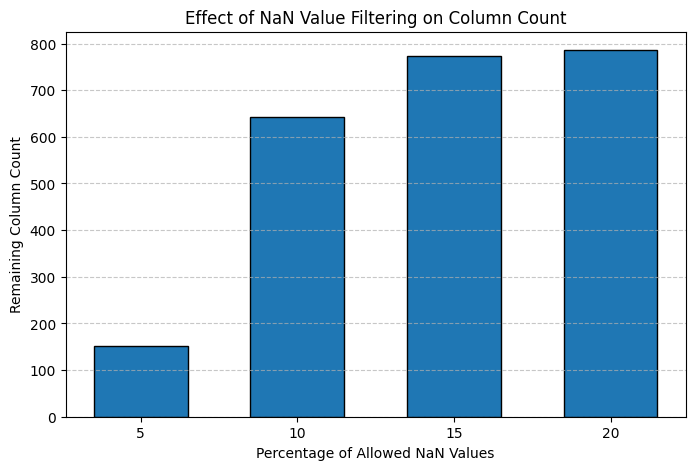

In [399]:
visualize_nan_proportion(ExE)


## Nonessential x Nonessential Interactions

Gene count after removing interactions with 5% nan values: 3
Gene count after removing interactions with 10% nan values: 3098
Gene count after removing interactions with 15% nan values: 3776
Gene count after removing interactions with 20% nan values: 3827
Gene count witout filtering: 3827


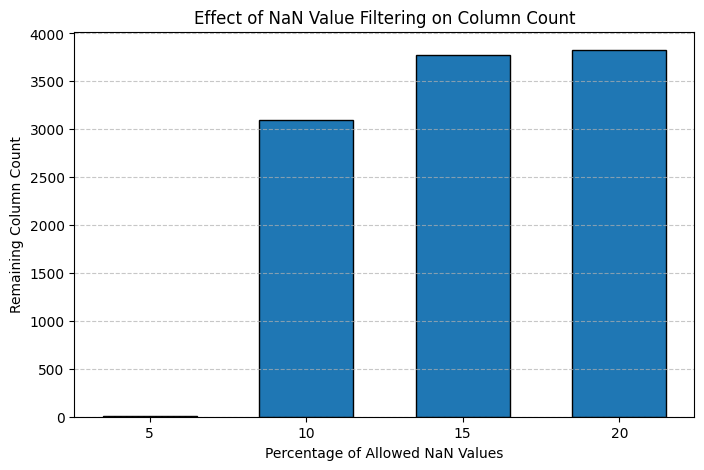

In [400]:
visualize_nan_proportion(NxN)

## Essential x Non-essential Interactions

Gene count after removing interactions with 5% nan values: 0
Gene count after removing interactions with 10% nan values: 0
Gene count after removing interactions with 15% nan values: 0
Gene count after removing interactions with 20% nan values: 223
Gene count after removing interactions with 25% nan values: 786
Gene count after removing interactions with 30% nan values: 4588
Gene count after removing interactions with 35% nan values: 4610
Gene count after removing interactions with 40% nan values: 4613
Gene count witout filtering: 4613


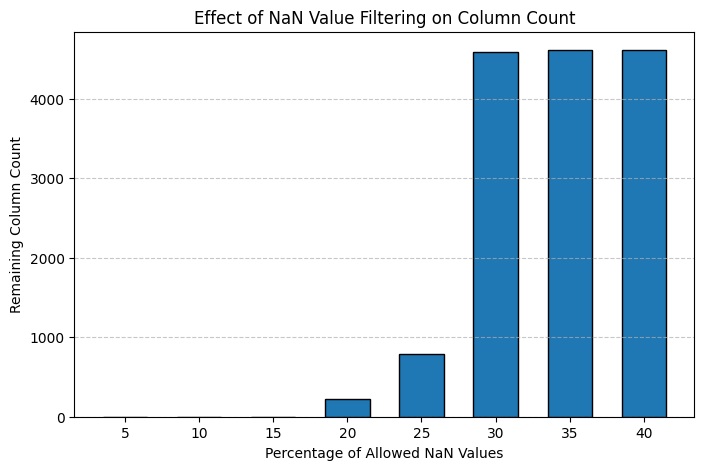

In [401]:
visualize_nan_proportion(ExN)

## Combine all Gene interactions

- All interactions and NaN values filled with mean

In [402]:
all_genes = sorted(set(ExE.index).union(ExE.columns).union(ExN.index).union(ExN.columns).union(NxN.index).union(NxN.columns))
ExE_ = ExE.groupby(by=ExE.index).mean().T.groupby(by=ExE.columns).mean().T.reindex(index=all_genes, columns=all_genes)
ExN_ = ExN.groupby(by=ExN.index).mean().T.groupby(by=ExN.columns).mean().T.reindex(index=all_genes, columns=all_genes)
NxN_ = NxN.groupby(by=NxN.index).mean().T.groupby(by=NxN.columns).mean().T.reindex(index=all_genes, columns=all_genes)

In [403]:
GxG = ExE_.fillna(0) + ExN_.fillna(0) + NxN_.fillna(0)
GxG[(ExE_.isna() & ExN_.isna() & NxN_.isna())] = np.nan

print(f"{GxG.isnull().sum().sum() / GxG.shape[0]**2 * 100:.2f}% NaN values")

GxG_filled = GxG.fillna(GxG.mean()).fillna(0).reset_index()

48.80% NaN values


In [404]:
GxG_filled

,gene_id,YAL001C,YAL002W,YAL003W,YAL004W,YAL005C,YAL007C,YAL008W,YAL009W,YAL010C,...,YPR192W,YPR193C,YPR194C,YPR195C,YPR196W,YPR197C,YPR198W,YPR199C,YPR200C,YPR201W
0,YAL001C,-0.00555,-0.01037,-0.005026,-0.003053,-0.003646,-0.001775,0.000908,0.0,-0.006982,...,-0.004764,-0.003254,-0.006384,-0.005947,-0.001382,-0.003377,-0.003008,-0.000763,-0.001832,-0.002903
1,YAL002W,-0.00555,-0.01037,-0.005026,-0.003053,-0.003646,-0.001775,0.000908,0.0,-0.006982,...,-0.012000,-0.026000,0.018000,0.013000,-0.008000,-0.009000,0.042000,-0.042000,-0.063000,0.004000
2,YAL003W,-0.00555,-0.01037,-0.005026,-0.003053,-0.003646,-0.001775,0.000908,0.0,-0.006982,...,-0.004764,-0.003254,-0.006384,-0.005947,-0.001382,-0.003377,-0.003008,-0.000763,-0.001832,-0.002903
3,YAL004W,-0.00555,-0.01037,-0.005026,-0.003053,-0.003646,-0.001775,0.000908,0.0,-0.006982,...,-0.004764,-0.003254,-0.006384,-0.005947,-0.001382,-0.003377,-0.003008,-0.000763,-0.001832,-0.002903
4,YAL005C,-0.00555,-0.01037,-0.005026,-0.003053,-0.003646,-0.001775,0.000908,0.0,-0.006982,...,-0.004764,-0.003254,-0.006384,-0.005947,-0.001382,-0.003377,-0.003008,-0.000763,-0.001832,-0.002903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5283,YPR197C,-0.00555,-0.01037,-0.005026,-0.003053,-0.003646,-0.001775,0.000908,0.0,-0.006982,...,-0.004764,-0.003254,-0.006384,-0.005947,-0.001382,-0.003377,-0.003008,-0.000763,-0.001832,-0.002903
5284,YPR198W,-0.00555,0.03800,-0.005026,-0.072000,-0.034000,0.034000,0.032000,0.0,0.019000,...,-0.004764,-0.003254,-0.006384,-0.005947,-0.001382,-0.003377,-0.003008,-0.000763,-0.001832,-0.002903
5285,YPR199C,-0.00555,0.01500,-0.005026,0.026000,0.002000,-0.013000,-0.013000,0.0,-0.044000,...,-0.004764,-0.003254,-0.006384,-0.005947,-0.001382,-0.003377,-0.003008,-0.000763,-0.001832,-0.002903
5286,YPR200C,-0.00555,-0.01037,-0.005026,-0.003053,-0.003646,-0.001775,0.000908,0.0,-0.006982,...,-0.004764,-0.003254,-0.006384,-0.005947,-0.001382,-0.003377,-0.003008,-0.000763,-0.001832,-0.002903


## Extract Data

Using KNN Imputer, as Costanzo's studies (2016 and 2021) indicate that genes with similar functions tend to exhibit similar interactions with other genes.

In [405]:
GxG_filled.to_csv("extracted_data/GxG_filled.csv", index=True)

In [406]:
max_nans_15 = (ExE.shape[1] * 15) // 100  
ExE_cleared = ExE.loc[:, ExE.isna().sum() <= max_nans_15]

max_nans_15 = (NxN.shape[1] * 15) // 100  
NxN_cleared = NxN.loc[:, NxN.isna().sum() <= max_nans_15]


In [390]:
knn_imputer = KNNImputer(n_neighbors=5) 

ExE_imputed = knn_imputer.fit_transform(ExE_cleared)
NxN_imputed = knn_imputer.fit_transform(NxN_cleared)

ExE_imputed = pd.DataFrame(ExE_imputed, columns=ExE_cleared.columns, index=ExE_cleared.index)
NxN_imputed = pd.DataFrame(NxN_imputed, columns=NxN_cleared.columns, index=NxN_cleared.index)


In [391]:
ExE_imputed.to_csv("extracted_data/ExE_imputed.csv", index=True)
NxN_imputed.to_csv("extracted_data/NxN_imputed.csv", index=True)